In [0]:
#%%sh
!pip install pandas

# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.listdir(os.path.join('gdrive', 'My Drive', 'BABE AI', 'LogisticRegression', 'data', 'dicts'))

['stop_words.txt', 'id_full.txt']

In [0]:
data_dir = os.path.join('gdrive', 'My Drive', 'BABE AI', 'LogisticRegression', 'data', 'category')
sport_f = os.path.join(data_dir, 'id_video_sport.txt')
tech_f = os.path.join(data_dir, 'id_video_tech.txt')
politics_f = os.path.join(data_dir, 'id_video_politics.txt')
games_f = os.path.join(data_dir, 'id_video_games.txt')
lifestyle_f = os.path.join(data_dir, 'id_video_title_lifestyle.txt')

# Read texts into list
def read_lines(filepath):
    with open(filepath) as fp:
        content = fp.readlines()
        content = [x.strip() for x in content]
    return content
  
 
sport = read_lines(sport_f)
tech = read_lines(tech_f)
politics = read_lines(politics_f)
games = read_lines(games_f)
lifestyle = read_lines(lifestyle_f)

data = {'tech': tech, 'politics': politics, 'games': games, 'lifestyle': lifestyle}

print('data size: {}, {}, {}, {}, {}'.format(len(sport), len(tech), len(politics), len(games), len(lifestyle)))

data size: 7978, 20794, 31499, 8921, 19768


In [0]:
import pandas as pd

def create_dataframe_with_label(sport, tech, politics, games, lifestyle):
  cmt_all = sport + tech + politics + games + lifestyle
  
  #make label
  label = []
  for _ in sport:
    label.append(0)
  for _ in tech:
    label.append(1)
  for _ in politics:
    label.append(2)
  for _ in games:
    label.append(3)
  for _ in lifestyle:
    label.append(4)
    
  #create a pandas dataframe using text and labels
  trainDF = pd.DataFrame()
  trainDF['text'] = cmt_all
  trainDF['label'] = label
  return trainDF
    

In [0]:
data = create_dataframe_with_label(sport,tech,politics,games,lifestyle)
print(data.head(20))

                                                 text  label
0   2016 wtf world taekwondo junior championships ...      0
1   deretan pemain bintang yg di tenggelamkan jose...      0
2                            dovizioso takeover rossi      0
3    top 7 greatest usa olympic basketball teams ever      0
4   tak kunjung di tawari perpanjangan kontrak per...      0
5   kiper filipina nangis ini detik2 kejadian dari...      0
6   respect ucapan semangat banjiri instagram kipe...      0
7   barcelona vs real madrid 1-1 all goals 03/12/2016      0
8   persegres gresik united vs mitra kukar 2-4 all...      0
9   merinding rosi ternyata menggunakan jimat dise...      0
10                   korsel vs brunei darussalam 11 0      0
11  chile vs ecuador 2-1 all goals highlights worl...      0
12  pertama kali tanpa nil semen padang siap hadap...      0
13  konferensi pers dan latihan timnas sebelum mel...      0
14  latihan persib bandung sebelum melawan persiba...      0
15  lucu banget perayaan

In [0]:
print(data.sample(30))

                                                    text  label
47853  palang pintu pejabat pemerintah daerah jakarta...      2
66310                     the robot eps 2 mcpe machinima      3
71595  benih biji jeruk purut harga murah banyak manf...      4
1809     sengit porprov sumbar solok-selatan agam padang      0
39495                        demokrat total dukung danny      2
88883  bnn news bnn gandeng bpom awasi peredaran prek...      4
51142    debat publik pasangan cagub cawagub kalbar 2018      2
14652  unboxing gimbal stabil murah x-cam sight 2 sta...      1
43446             ketum pan poros ketiga butuh keajaiban      2
62730  ga ada yang mau buat bully sekalian kah u0001f...      3
82612         inilah 4 manfaat tidak tidur setelah subuh      4
47141  fraksi nasdem walk out bukan krn tak dapat kur...      2
86739  dunia meleleh karena pernikahan song-song couples      4
79764  berapa kali baiknya mencuci kulit wajah dalam ...      4
39645                ucapan selamat ulta

In [0]:
def load_stop_words():
  # Get the set of stopwords
  stop_words_f = os.path.join('gdrive', 'My Drive', 'BABE AI', 'LogisticRegression', 'data', 'dicts', 'stop_words.txt')

  flines = read_lines(stop_words_f)
  return set([x.strip() for x in flines])

In [0]:
stop_words = load_stop_words()
print(len(stop_words))

7193


In [0]:
#install beautifulSoup
#!pip install bs4
# For cleansing
from bs4 import BeautifulSoup
import re
# text cleansing function
def raw_to_words(raw_text, stop_words=None):
    # 1. Remove HTML
    text_1 = BeautifulSoup(raw_text).get_text()
    
    # 2. Remove non-letters with regex
    letters_only = re.sub("[^a-zA-Z]", " ", text_1)
    
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()
    
    # 4. Remove stop words
    if stop_words:
        meaningful_words = [w for w in words if not w in stop_words]   
    else:
        meaningful_words = words
    
    # 5. Join the words back into one string separated by space & return
    return(" ".join(meaningful_words))

In [0]:
# check to see how the cleansing function works
print(sport[1])
print(raw_to_words(sport[1], stop_words=stop_words))

deretan pemain bintang yg di tenggelamkan jose mourinho
deretan pemain bintang tenggelamkan jose mourinho


In [0]:
clean_data = data
clean_data['text'] = clean_data['text'].apply(raw_to_words, stop_words=stop_words)
clean_data = clean_data.loc[clean_data['text']!='']
print(clean_data.head())

                                                text  label
0  wtf world taekwondo junior championships male ...      0
1  deretan pemain bintang tenggelamkan jose mourinho      0
2                           dovizioso takeover rossi      0
3     top greatest usa olympic basketball teams ever      0
4  kunjung tawari perpanjangan kontrak persib boa...      0


In [0]:
# Plot
#import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def show_wordcloud(data, stop_words, title=None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop_words,
        #max_words=200,
        max_font_size=80,
        width=800,
        height=600,
        ).generate(str(data))
    fig = plt.figure(1, figsize=(8, 6))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show()

In [0]:
#get sport samples
sport_samples = clean_data.loc[clean_data['label'] == 0]

#get tech samples
tech_samples = clean_data.loc[clean_data['label'] == 1]

#get politics samples
politics_samples = clean_data.loc[clean_data['label'] == 2]

#get games samples
games_samples = clean_data.loc[clean_data['label'] == 3]

# get lifestyle sampels
lifestyle_samples = clean_data.loc[clean_data['label'] == 4]

bigtext_sport = " ".join(list(sport_samples['text']))
print(len(bigtext_sport))
bigtext_tech = " ".join(list(tech_samples['text']))
print(len(bigtext_tech))

387162
872102


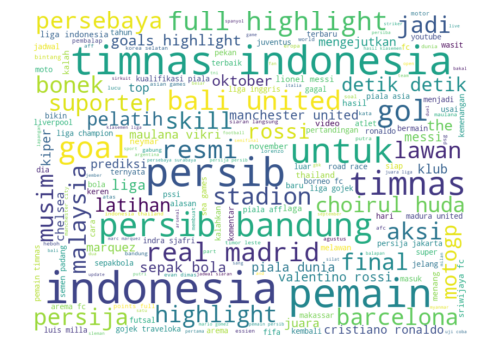

In [0]:
show_wordcloud(bigtext_sport, stop_words)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn import decomposition, ensemble
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [0]:
# split the dataset into training and validation datasets
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(clean_data['text'], clean_data['label'])
print(len(train_x), len(valid_x))

66720 22240


In [0]:
# create a count vectorizer
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(clean_data['text'])
# transform the training and validation data using count vectorizer
xtrain_count = count_vect.transform(train_x)
xvalid_count = count_vect.transform(valid_x)
print(xtrain_count.shape, xvalid_count.shape)

# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}')
tfidf_vect.fit(clean_data['text'])
xtrain_tfidf = tfidf_vect.transform(train_x)
xvalid_tfidf = tfidf_vect.transform(valid_x)
print(xtrain_tfidf.shape, xvalid_tfidf.shape)

(66720, 45165) (22240, 45165)
(66720, 45165) (22240, 45165)


In [0]:
#train model
logistic_r = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
logistic_r.fit(xtrain_tfidf, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [0]:
# get the predictions
pred_valid = logistic_r.predict(xvalid_tfidf)
print("Validation set")
print("Accuracy:", metrics.accuracy_score(pred_valid, valid_y))
print("Report:\n", metrics.classification_report(valid_y, pred_valid))

Validation set
Accuracy: 0.9618705035971223
Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2066
           1       0.94      0.95      0.94      5249
           2       0.99      1.00      0.99      7821
           3       0.94      0.90      0.92      2234
           4       0.95      0.96      0.95      4870

   micro avg       0.96      0.96      0.96     22240
   macro avg       0.95      0.95      0.95     22240
weighted avg       0.96      0.96      0.96     22240

